# Car Price Prediction

The goal is to predict car price

The followings describe the features in the dataset

- **name** : Brand and series of the car
- **Year** : The year when the car is produced
- **selling_price** : Selling price of the car
- **km_driven** : The amount of kilometer that the car was driven before selling the car
- **fuel** : The type of fuel used in the car
- **seller_type** : The channel through which the deal of car is organized
- **transmission** : The gear transmission type that is used in the car
- **owner** : The number of times that the car was traded before
- **mileage** : The kilometers that can be traveled by using the fuel of 1 liter or 1 kg
- **engine** : The size of the engine
- **max_power** : The maximum power of engine measured in bhp. (BHP - the brake horsepower is the horse power after taking account of losses due to friction)
- **torque** : Torque
- **seats** : The number of seats in the car

## Importing libraries

In [427]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import os

warnings.filterwarnings('ignore')

In [428]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.0', '2.2.2', '0.13.2', '3.9.2')

## 1. Load data

In [429]:
# Load the data
df = pd.read_csv(os.path.join(os.getcwd(),"data/Cars.csv"))

In [430]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [431]:
# Check the shape of your data
df.shape

(8128, 13)

In [432]:
# Statistical info 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [433]:
# Check Dtypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [434]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### 2.1 Data Cleansing

We need to perform data cleansing as the data is not tidy yet.

In [435]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [436]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


####  2.1.1 - We will remove torque feature as we don't understand the feature

In [437]:
# Remove torque feature
df.drop('torque',axis=1,inplace=True)

####  2.1.2 - We will remove the rows with owner "Test Drive Car" as the price is too high which makes them outliers and this only has 5 rows

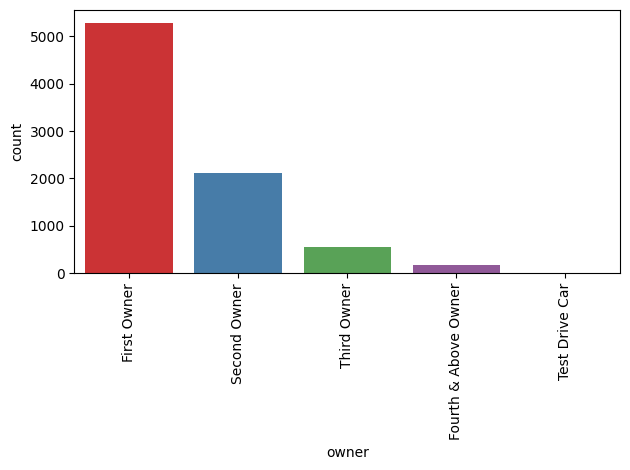

In [438]:
# Checking counts of owner types
ax = sns.countplot(data = df, x = 'owner',palette= 'Set1')
ax.set_xticklabels(df['owner'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [439]:
# checking the count of test drive car
df.loc[df['owner'] == 'Test Drive Car','selling_price'].count()

np.int64(5)

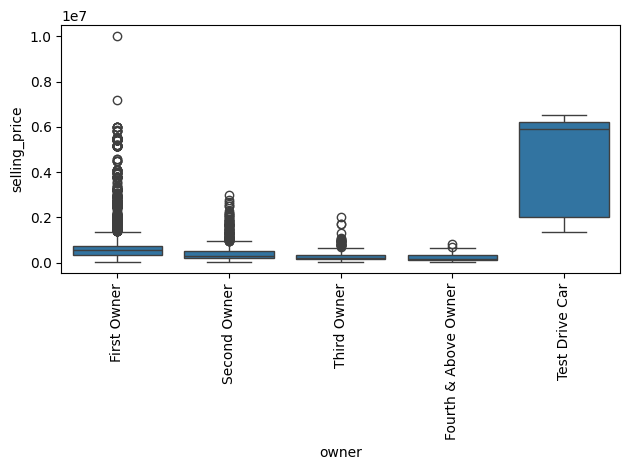

In [440]:
# checking the distribution of owner types
ax = sns.boxplot(x = df["owner"], y = df["selling_price"])
ax.set_xticklabels(df['owner'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [441]:
# Remove rows with "Test Drive Car"
df = df[df['owner'] != 'Test Drive Car']

####  2.1.3 - We will map the owner types to 1 to 4

In [442]:
owner = {'First Owner' : 1,
         'Second Owner' : 2,
         'Third Owner' : 3,
         'Fourth & Above Owner' : 4
         }

for k,v in owner.items():
    df.replace(k,v,inplace=True)

####  2.1.4 - We will remove the rows with fuel types "LPG" and "CNG" as they use different mileage units and it has only 38 rows

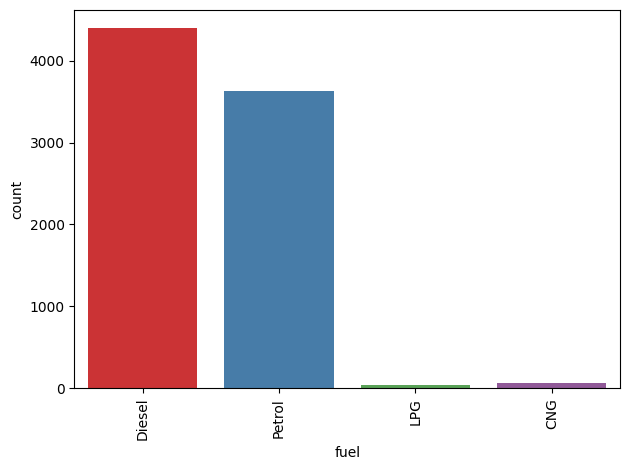

In [443]:
# Checking counts of fuel types
ax = sns.countplot(data = df, x = 'fuel',palette= 'Set1')
ax.set_xticklabels(df['fuel'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [444]:
# Checking fuel milage units
df[df['fuel'].isin(['LPG','CND'])]['mileage'].head()

6       17.3 km/kg
90      26.2 km/kg
870     26.2 km/kg
1511    26.2 km/kg
1658    17.3 km/kg
Name: mileage, dtype: object

In [445]:
# Checking the number of fuel types "LPG,CNd"
df[df['fuel'].isin(['LPG','CND'])].shape

(38, 12)

In [446]:
# Remove the rows with fuel types "LPG,CNd"
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

####  2.1.5 - removing unit 'kmpl' in 'milage' feature and convert it into numerical feature

In [447]:
# Replace 'kmpl' with blank
df.loc[df['mileage'].str.split(" ").str[1] == 'kmpl', 'mileage'] = df.loc[df['mileage'].str.split(" ").str[1] == 'kmpl', 'mileage'].str.replace(" kmpl", "")

In [448]:
# Convert mileage feature to float
df['mileage'] = df['mileage'].astype(float)

####  2.1.6 - removing unit 'CC' in 'engine' feature and convert it into numerical feature

In [449]:
# Replace 'CC' with blank
df.loc[df['engine'].str.split(" ").str[1] == 'CC', 'engine'] = df.loc[df['engine'].str.split(" ").str[1] == 'CC', 'engine'].str.replace(" CC", "")

In [450]:
# Convert engine feature to float
df['engine'] = df['engine'].astype(float)

####  2.1.7 - removing unit 'bhp' in 'max_power' feature and convert it into numerical feature

In [451]:
# Replace 'bhp' with blank
df.loc[df['max_power'].str.split(" ").str[1] == 'bhp', 'max_power'] = df.loc[df['max_power'].str.split(" ").str[1] == 'bhp', 'max_power'].str.replace(" bhp", "")

In [452]:
# Convert max_power feature to float
df['max_power'] = df['max_power'].astype(float)

####  2.1.8 - We will transform the name feature to brand feature by taking the first word of names

In [453]:
# rename the column
df.rename(columns = {'name':'brand'}, inplace = True)

In [454]:
# Taking the first word of name
df['brand'] = df['brand'].str.split(" ").str[0]

In [455]:
# Checking clean data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### 2.2 Univariate analysis

Single variable exploratory data anlaysis

#### Checking distributions

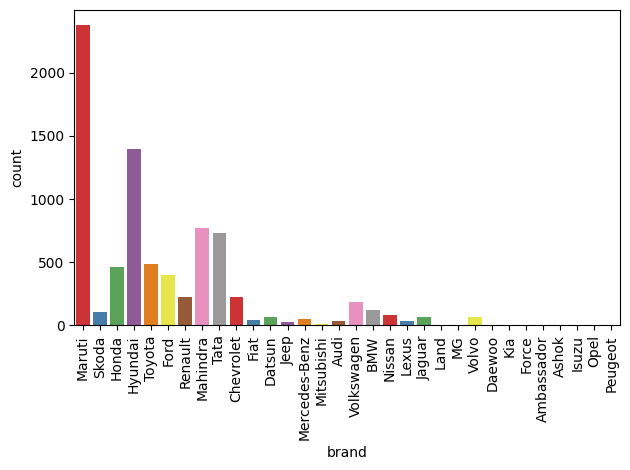

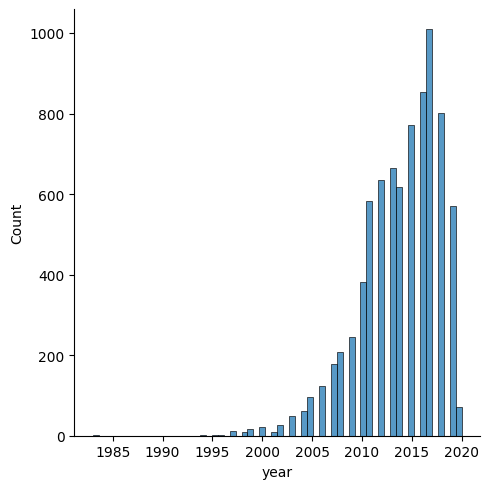

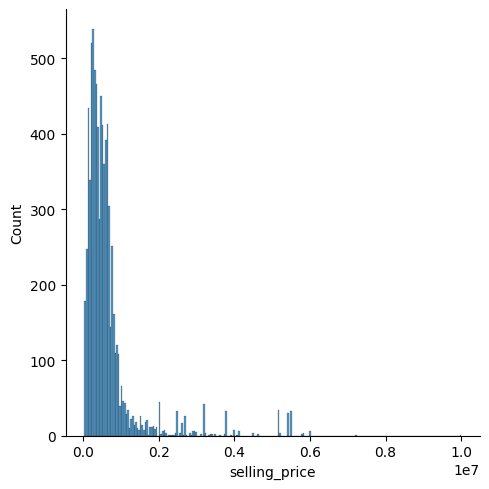

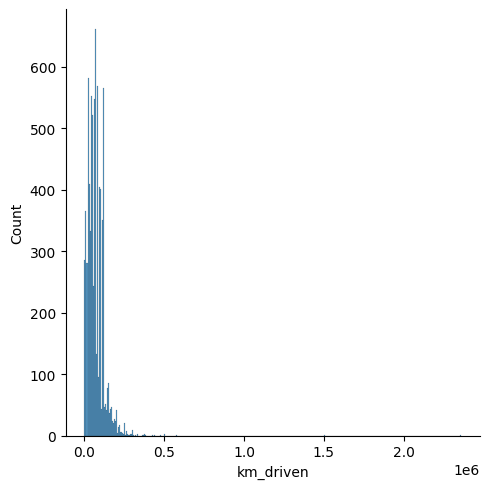

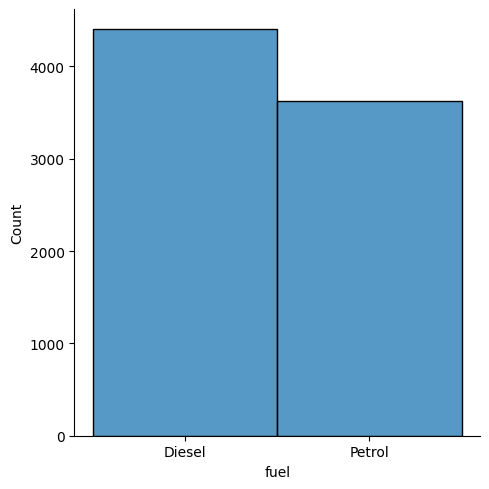

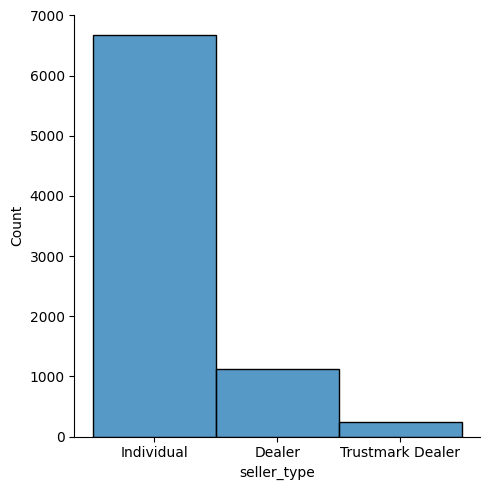

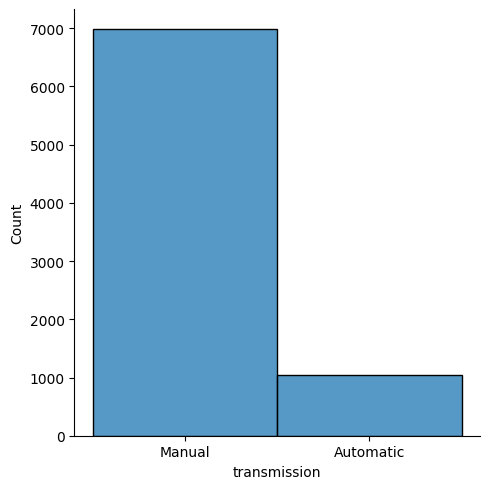

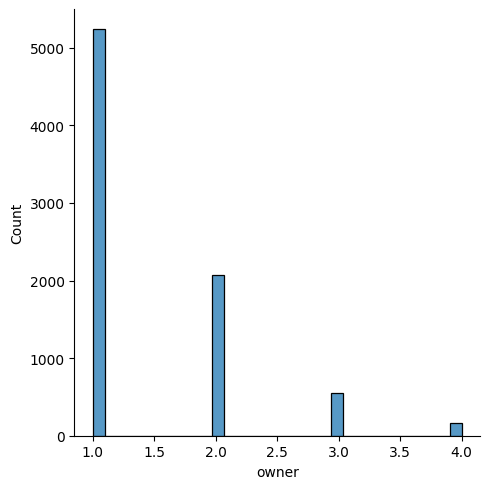

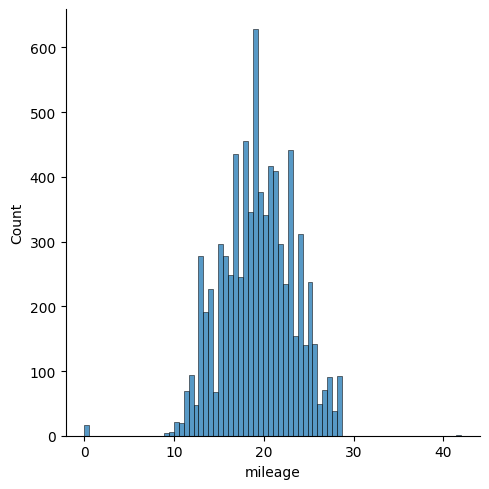

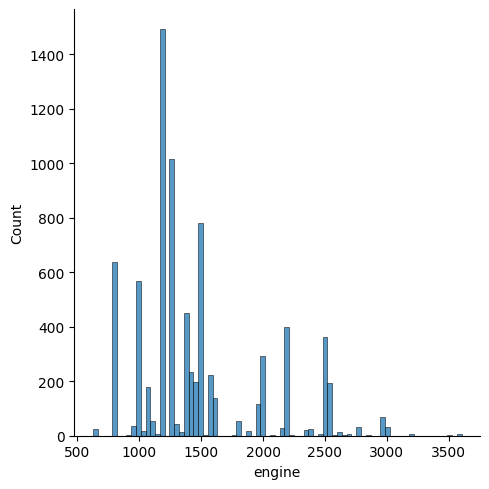

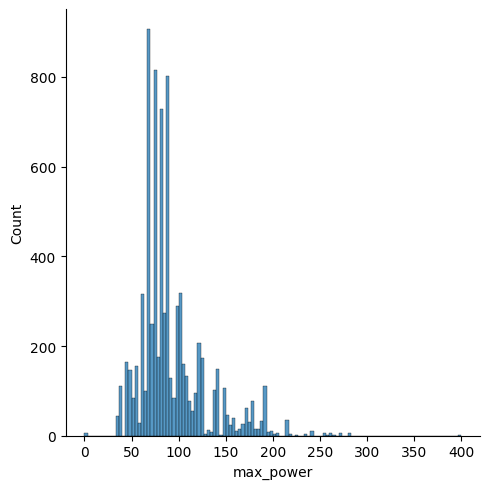

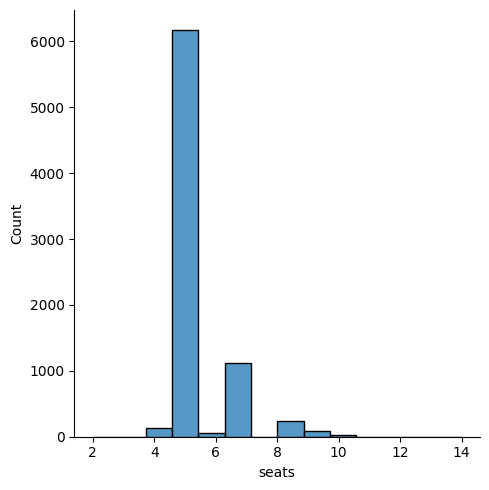

In [456]:
for j,i in enumerate(df.columns):
    if i == 'brand':
        ax = sns.countplot(data = df, x = i,palette= 'Set1')
        ax.set_xticklabels(df[i].unique(),rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        sns.displot(data=df,x=df[i])
        plt.show()
    

### 2.3 Multivariate analysis

Multiple variable exploratory data analysis

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting car price.  It's also for checking whether certain features are too correlated.

In [457]:
df_corr = df[[ 'year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats']]


<Axes: >

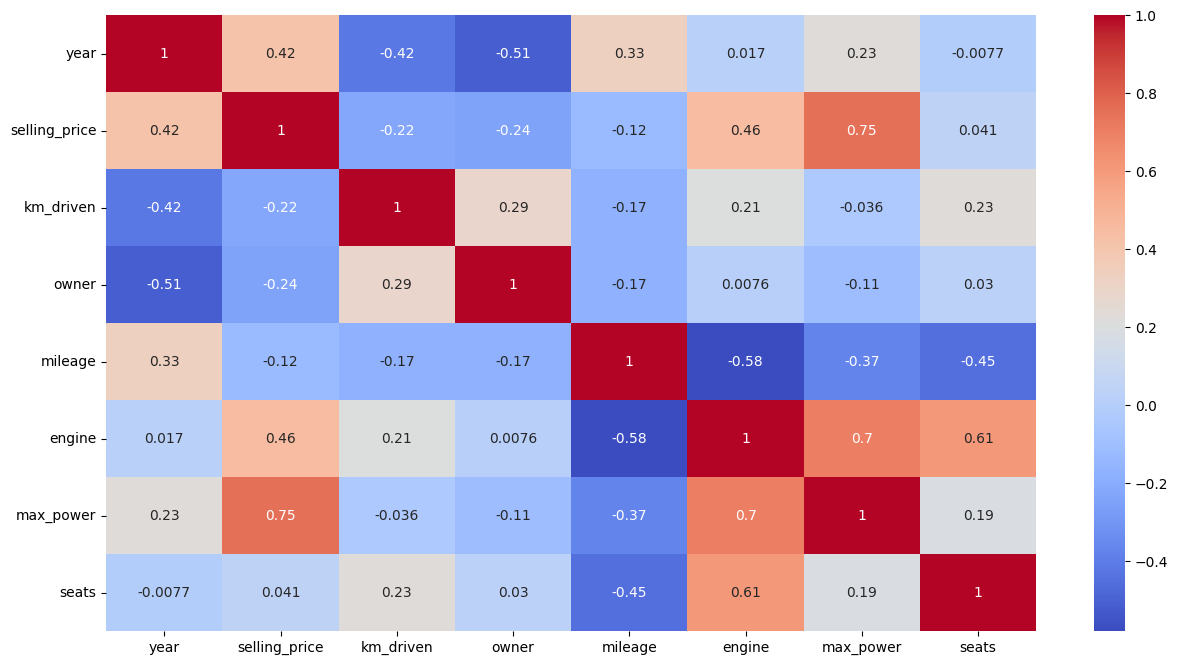

In [458]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding

Apply Label encoding to categorical features to see the correlations

In [459]:
# check unique values of four categorical features 

print(f"brand : {len(df['brand'].unique())}")
print(f"fuel : {len(df['fuel'].unique())}")
print(f"transmission : {len(df['transmission'].unique())}")
print(f"seller_type : {len(df['seller_type'].unique())}")

brand : 32
fuel : 2
transmission : 2
seller_type : 3


In [460]:
# apply label encoding to check corelation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["transmission"] = le.fit_transform(df["transmission"])
df["brand"] = le.fit_transform(df["brand"])
df["seller_type"] = le.fit_transform(df["seller_type"])

print(df["fuel"].unique(),df["transmission"].unique())
print(df["brand"].unique(),df["seller_type"].unique())

[0 1] [1 0]
[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25] [1 0 2]


<Axes: >

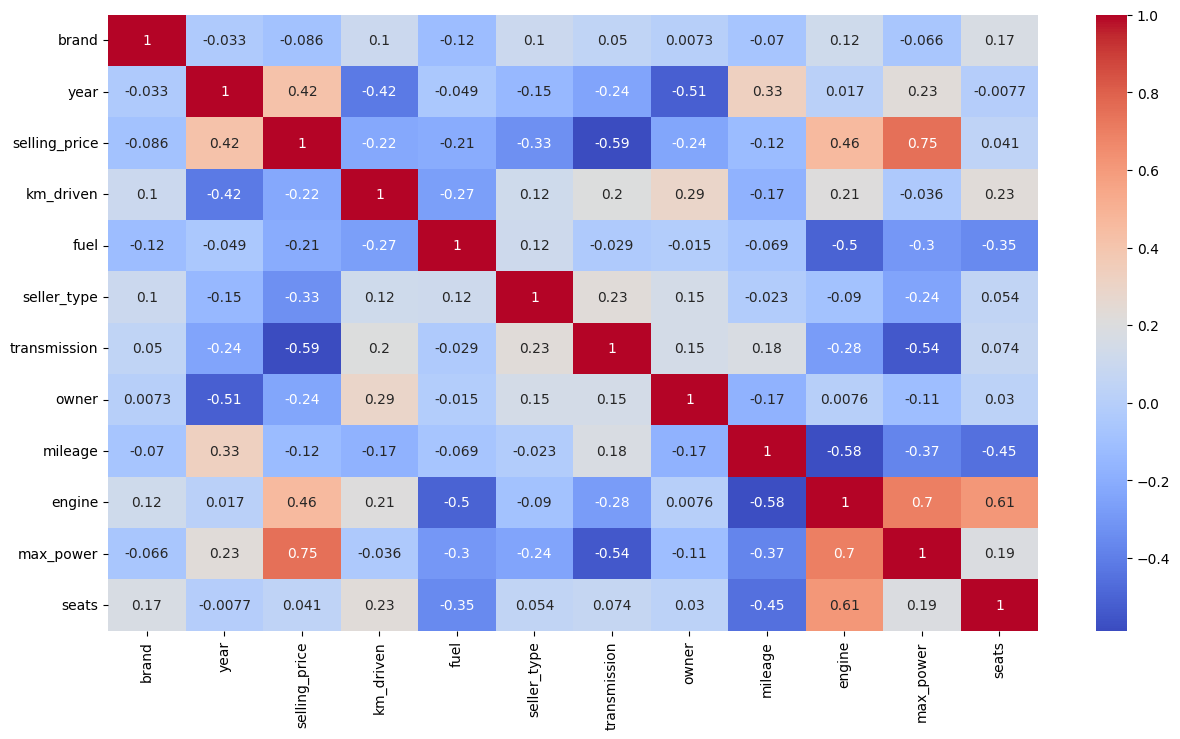

In [461]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

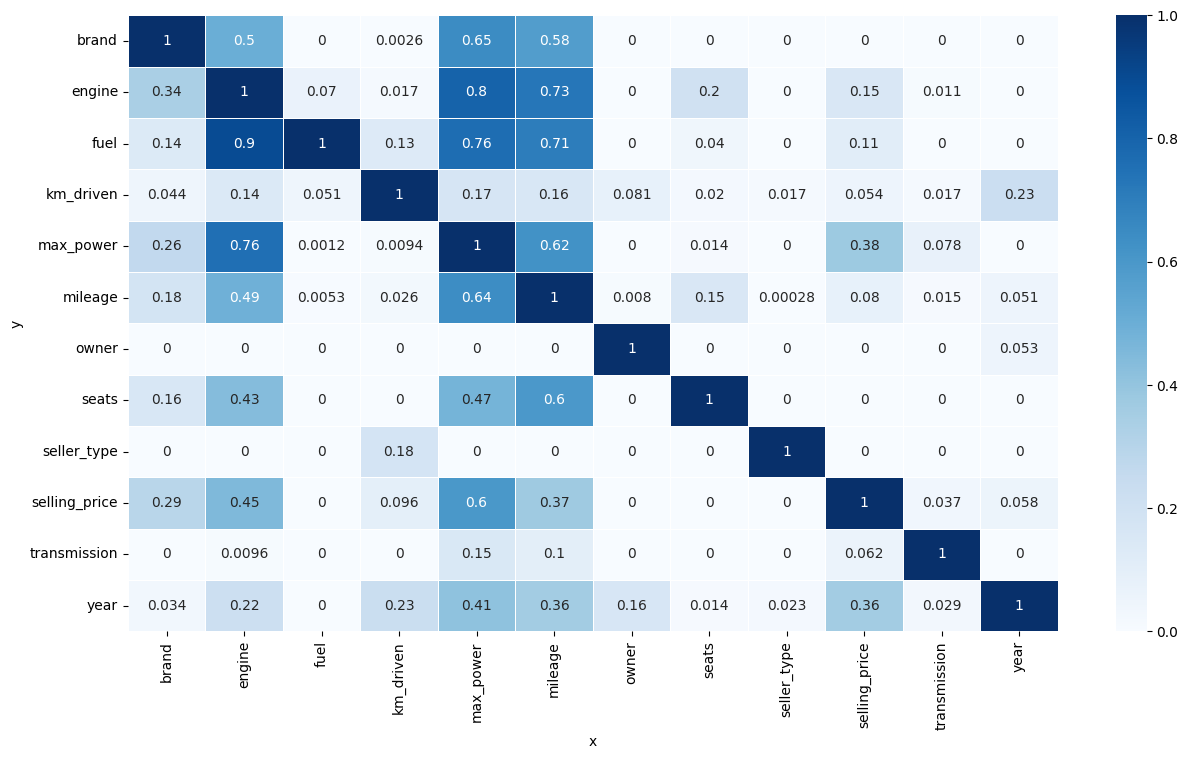

In [462]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
# dfcopy.drop(['country', 'year'], axis='columns', inplace=True)
# pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot()
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### The brand feature will not be chosen to train model as it does not explain much to selling price. The seller_type has three unique categories. So, this feature will be one-hot encoded.

In [463]:
df['seller_type'] = le.inverse_transform(df['seller_type'] )

In [464]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0


In [465]:
df = pd.get_dummies(data=df,columns=['seller_type'],drop_first=True,dtype=int)

In [466]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,20,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,27,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,10,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,11,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,20,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


In [467]:
# normalizing the feature
df['year'] = df['year'].apply(lambda x : (x - 1886) / (2024-1886) )

## 3. Feature Engineering

We gonna skip Feature Engineering for now

## 4. Feature selection

According to the correlation matrix

- seats and brand have less than 0.2 of correlation scores with selling_price(target). So, these features will be removed.
- max_power and engine are highly correlated with 0.7. But, I will keep them both as high max_power with small engine might explain built quality of car (in terms of power losses due to friction)

According to the predictive power score

- transmission, owner, seller_type and km_driven has less than 0.1 score. 
- But, only km_driven will be removed as the others have fair correlation scores with selling_price and also with assumption of they are somewhat important and nuanced features.

In [468]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [469]:
#x is our strong features
X = df[['year', 'fuel', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission', 'owner', 'engine', 'max_power']]

#y is simply selling price
y = df["selling_price"]

In [470]:
# check if y has missing values to remove
df["selling_price"].isna().sum()

np.int64(0)

### Train test split

In [471]:
df.shape

(8028, 13)

In [472]:
# I assume only 10 percent of test data will be enough as it is around 800.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## 5. Preprocessing

### Null values

In [473]:
#check for null values
X_train.isna().sum()

year                              0
fuel                              0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission                      0
owner                             0
engine                          199
max_power                       193
dtype: int64

In [474]:
X_test.isna().sum()

year                             0
fuel                             0
seller_type_Individual           0
seller_type_Trustmark Dealer     0
transmission                     0
owner                            0
engine                          15
max_power                       15
dtype: int64

#### As the distributions of engine and max_power has right skewness, median values will be used to replace 

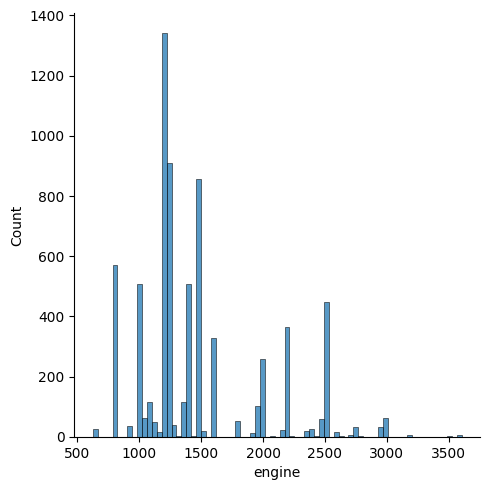

In [475]:
sns.displot(data=X_train, x='engine')

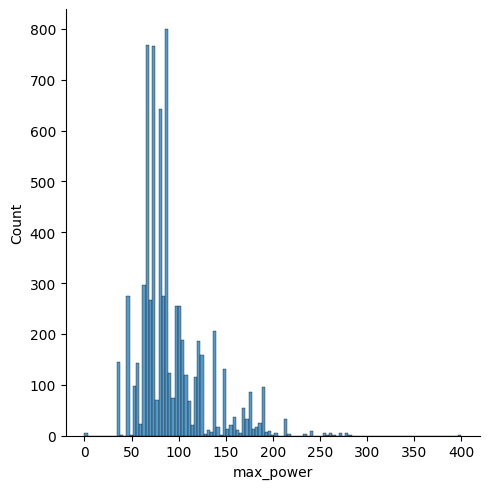

In [476]:
sns.displot(data=X_train, x='max_power')

In [477]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [478]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [479]:
#check again
X_train.isna().sum()

year                            0
fuel                            0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission                    0
owner                           0
engine                          0
max_power                       0
dtype: int64

In [480]:
X_test.isna().sum()

year                            0
fuel                            0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission                    0
owner                           0
engine                          0
max_power                       0
dtype: int64

### Checking Outliers

#### For two numerical features of engine and max_power, outliers need to be checked for scaling

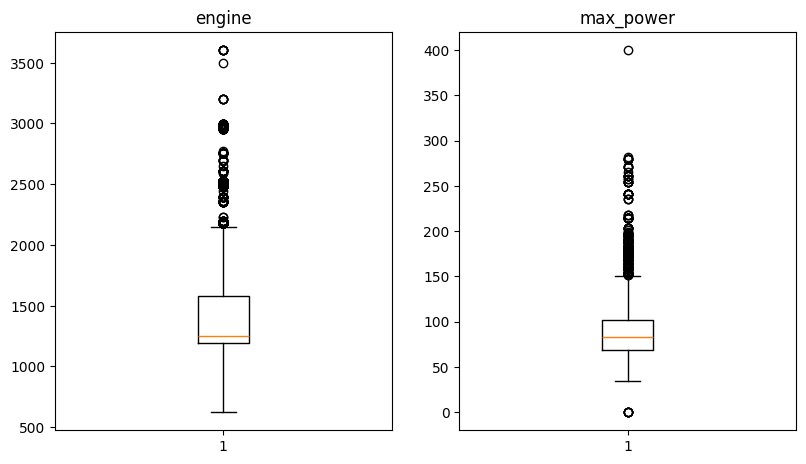

In [481]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [482]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [483]:
for col in ['engine','max_power']:
    outlier_count(col)


---------------engine---------------

Number of outliers: 1079
Percent of data that is outlier: 14.93%

---------------max_power---------------

Number of outliers: 519
Percent of data that is outlier: 7.18%


### Scaling

#### As the features of engine and max_power has a considerable amount of outliers and skewness and they are not in a bounded range, standardization can be used to scale.

In [484]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train[['engine','max_power']] = scaler.fit_transform(X_train[['engine','max_power']])
X_test[['engine','max_power']]  = scaler.transform(X_test[['engine','max_power']])

#### For selling_price(y), np.log will be used to scale 

In [485]:
y_train = y_train.apply(np.log)
y_test = y_test.apply(np.log)

In [486]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (7225, 8)
Shape of X_test:  (803, 8)
Shape of y_train:  (7225,)
Shape of y_test:  (803,)


# 6. Modeling

Modifying the Linear Regression class
- allow to 2 degree polynomials
- update weights with momentum
- add Xavier weight initialization
- add r2_score function
- add plot_feature_importance function

In [968]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=5)
            
    def __init__(self, regularization, lr=0.001, method='batch', momentum=0,initialize='xavier',
                 num_epochs=500, batch_size=50, cv=kfold,polynomial=True):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.momentum = momentum
        self.initialize = initialize
        self.grad = 0
        self.polynomial = False
        self.degree = 2
        self.features = None
        self.poly_graph = None
        self.infer = True


    def mse(self, ytrue, ypred): # modify this function to set m = 1 for sto 
        if self.method == 'sto':
            m = 1
        else:
            m = ytrue.shape[0]
        return ((ypred - ytrue) ** 2).sum() / m
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores_mse = list()
        self.kfold_scores_r2 = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        # if poynomial is true, transform feature
        if self.polynomial == True:
            X_train,self.features,self.poly_graph = self._poly(X_train)
            regg = "Polynomial"
        else:
            self.features = X_train.columns
            intercept = np.ones((X_train.shape[0], 1))
            X_train   = np.concatenate((intercept, X_train), axis=1)
            regg = "Linear"
        
        y_train = y_train.to_numpy()
        
        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            self.grad = 0
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            # Initialize weights as per self.initialize
            if self.initialize == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            if self.initialize == 'xavier':
                # number of samples
                m,n = X_cross_train.shape
                # range of weights
                upper, lower = -(1.0/np.sqrt(m)), (1.0/np.sqrt(m))
                # get random numbers
                numbers = np.random.rand(n)
                scaled = lower + numbers * (upper-lower)
                self.theta = scaled
                self.theta[0] = 0
                # print(self.theta)
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__ + f"_{regg}",
                          "momentum" : self.momentum , "initialize_weights" : self.initialize
                          }
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx]
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)
                        # print(self.theta)
                        # print(self.grad)
                        # print(train_loss)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    
                    # Added r2 to compare the performance
                    self.infer = False
                    yhat_val = self.predict(X_cross_val)
                    self.infer = True
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    r2_score = self.r2_score(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="Val_R2", value=r2_score, step=epoch)
                    
                    # self.val_mse.append(round(val_loss_new,2))
                    # self.val_r2.append(round(r2_score,2))
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores_mse.append(round(val_loss_new,2))
                self.kfold_scores_r2.append(round(r2_score,2))
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        self.infer = False
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        # use update function to update grad with momentum
        self.theta = self._update(grad)
        # self.theta = self.theta - self.lr * grad
        self.infer = True
        return self.mse(y, yhat)
    
    def predict(self, X):
        if self.infer == True:
            if self.polynomial == True:
                X = self.poly_graph.transform(X)
            else:
                intercept = np.ones((X_train.shape[0], 1))
                X   = np.concatenate((intercept, X), axis=1)
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    # r2 function
    def r2_score(self, ytrue, ypred):
        return 1 - (((ytrue - ytrue.mean()) ** 2).sum() / ((ytrue - ypred) ** 2).sum())
    
    # update the gradients with momentum
    def _update(self,grad):
        step = self.lr * grad
        # print(self.lr * grad)
        prev_step =  self.lr * self.grad
        self.grad = grad
        return self.theta - step + self.momentum * prev_step
    
    # Plot feature importance
    def plot_feature_importance(self):
        coef_matrix = self._coef()
        sorted_idx=coef_matrix.argsort()
        plt.barh(self.features[1:][sorted_idx], coef_matrix[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.show()
        
    def _poly(self,X):
        poly = PolynomialFeatures(self.degree)
        X_transform = poly.fit_transform(X)
        features = poly.get_feature_names_out()
        return X_transform,features,poly

In [969]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
# Added no penalty class
class NoPenalty:
    
    def __init__(self, l):
        self.l = 0 # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr,momentum,initialize,l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method,momentum,initialize)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr,momentum,initialize,l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method,momentum,initialize)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr,momentum,initialize,l,l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method,momentum,initialize)

# Normal Linear Regression without regularization        
class Normal(LinearRegression):
    
    def __init__(self, method, lr,momentum,initialize,l):
        self.regularization = NoPenalty(l)
        super().__init__(self.regularization, lr, method,momentum,initialize)

### 6.1 Experiment

To perform experiments, the following functions are defined for convenience

In [970]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

str_to_class("Ridge")

__main__.Ridge

In [971]:
# generating all possible experiments
polyno = [True,False]
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
method = ['batch','mini','sto']
lr = [0.01,0.001,0.0001]
initi = ['zeros','xavier']
mmt = [0,0.4,0.7,0.99]
experiments = pd.DataFrame(list(itertools.product(regs,polyno,method,mmt,initi,lr)),
                           columns=['Regression','Polynomial','GD_methods','Momentum_Term','Weight_Initialization','Learning_Rates'])
experiments.head()

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates
0,Ridge,True,batch,0.0,zeros,0.0100
1,Ridge,True,batch,0.0,zeros,0.0010
2,Ridge,True,batch,0.0,zeros,0.0001
3,Ridge,True,batch,0.0,xavier,0.0100
4,Ridge,True,batch,0.0,xavier,0.0010


In [972]:
# experiment helper function, this function facilitate to test on specific parameters by setting others the same

def experiment(experiments,test_on,regs='Ridge',polyno=False,method='batch',lr=0.01,initi='xavier',mmt=0.99):
    # query = f"Regression == '{regs}' & Polynomial == {polyno} & GD_methods == '{method}' & Learning_Rates == {lr} & Weight_Initialization == '{initi}'  & Momentum_Term == {mmt} "
    if test_on == 'regs':
        query = f"GD_methods == '{method}' & Learning_Rates == {lr} & Weight_Initialization == '{initi}'  & Momentum_Term == {mmt} "
    elif test_on == 'method':
        query = f"Regression == '{regs}' & Polynomial == {polyno} & Learning_Rates == {lr} & Weight_Initialization == '{initi}'  & Momentum_Term == {mmt} "
    elif test_on == 'lr':
        query = f"Regression == '{regs}' & Polynomial == {polyno} & GD_methods == '{method}' & Weight_Initialization == '{initi}'  & Momentum_Term == {mmt} "
    elif test_on == 'initi':
        query = f"Regression == '{regs}' & Polynomial == {polyno} & GD_methods == '{method}' & Learning_Rates == {lr} & Momentum_Term == {mmt} " 
    elif test_on == 'mmt':
        query = f"Regression == '{regs}' & Polynomial == {polyno} & GD_methods == '{method}' & Learning_Rates == {lr} & Weight_Initialization == '{initi}' "
    else:
        query = "All"
    # display(experiments.query(query))
    if query != "All":
        selected_exps = experiments.query(query)
    else:
        selected_exps = experiments
    
    val_mse = []
    val_r2 = []
    for index, row in selected_exps.iterrows():
        reg=row['Regression']
        pol=row['Polynomial']
        method=row['GD_methods']
        lr=row['Learning_Rates']
        mmt=row['Momentum_Term']
        initi=row['Weight_Initialization']
        
        if pol == True:
            reg_name = f"Polynomial_{reg}"
        if pol == False:
            reg_name = f"Linear_{reg}"
        params = {"method": method, 
                  "lr": lr,
                  "momentum" : mmt ,
                  'initialize' : initi,
                  "l": 0.1}
        exp_name = f"reg-{reg_name}-method-{params['method']}-lr-{params['lr']}-momentum-{params['momentum']}-initialize-{params['initialize']}"
        mlflow.start_run(run_name=exp_name, nested=True)
        
        print("="*5, reg_name, "="*5)
        print("--",params,"--")
        # params = {'method': 'sto', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'zeros', 'l': 0.1}
        # #######
        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
        model = type_of_regression(**params) 
        if pol == True:
            model.polynomial = True
        model.num_epochs = 100
        # model.momentum = None
        model.fit(X_train, y_train)
        val_mse.append(np.mean(model.kfold_scores_mse))
        val_r2.append(np.mean(model.kfold_scores_r2))

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        # #######

        mlflow.end_run()
        
    selected_exps['Val_MSE'] = val_mse
    selected_exps['Val_R2'] = val_r2
    
    return selected_exps
        
    
        

#### Experiment01 - regression types
To compare the performance of the linear and polynomial regression(2degree) with lasso, Ridge, ElasticNet and No regularization, cross-validation with 5 folds will be run for each regressions. Then, compare mse and r2 of validation set and choose the best one. Although r2 is monitored, val_mse will be the main factor to decide which regression is better as I assume that val_mse is a more decisive factor. All others parameters will be set the same for all iterations.

In [976]:
# Creating experiment in MLflow 
import mlflow
import os
mlflow.set_tracking_uri("http://localhost:5000")
os.environ["LOGNAME"] = "knl"
mlflow.set_experiment(experiment_name="Experiment01_regression_types")

# Running experiments
# experiment(experiments,test_on,regs='Ridge',polyno=False,method='batch',lr=0.01,initi='xavier',mmt=0.99)
method,lr,initi,mmt = 'batch',0.01,'xavier',0.99
Exp1_Result = experiment(experiments=experiments,test_on='regs',method=method,lr=lr,initi=initi,mmt=mmt)

2024/09/06 20:10:59 INFO mlflow.tracking.fluent: Experiment with name 'Experiment01_regression_types' does not exist. Creating a new experiment.


===== Polynomial_Ridge =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:11:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/a59e490ad2c04489b4cf9a441d3b1482.
2024/09/06 20:11:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 83.03858958712567


2024/09/06 20:11:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/d6fde601fb024714a2f13a81a5257e9d.
2024/09/06 20:11:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 83.37576629071452


2024/09/06 20:11:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/2a08c8679ff74faeb908f97336a69a6f.
2024/09/06 20:11:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 84.18835052332062


2024/09/06 20:11:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/20189c2ba4324cf98a29bb2d6aaf479d.
2024/09/06 20:11:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 83.00056791240807


2024/09/06 20:11:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/d2c240c163d24b87854d7862731856bb.
2024/09/06 20:11:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 84.28138933406224


2024/09/06 20:11:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/fef24fd2c81e4b2db9e0764d89f96021.
2024/09/06 20:11:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Linear_Ridge =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:11:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/385f038fe9ec44ceb177086a5308668c.
2024/09/06 20:11:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 137.40913005041182


2024/09/06 20:11:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/dbc9025db9b7437f95420065f1910a47.
2024/09/06 20:11:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 137.16378253851786


2024/09/06 20:11:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/56720c45ed60498781240938186f78cd.
2024/09/06 20:11:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 138.81664914098405


2024/09/06 20:11:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/57098657450a4cd4bc812ea381613135.
2024/09/06 20:11:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 136.76723118955198


2024/09/06 20:11:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/013327cd22e540df92434012beb003c5.
2024/09/06 20:11:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 137.28275748618083


2024/09/06 20:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Linear_Ridge-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/005d4cbbca6948c99f37f0b02e8ec4ff.
2024/09/06 20:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Polynomial_Lasso =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:11:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/b41c4017d53541278ed5cac2b6397d4d.
2024/09/06 20:11:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 83.07575656918716


2024/09/06 20:11:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/320f7cf2343d4c40a97be8f0ad331359.
2024/09/06 20:11:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 84.52684655660988


2024/09/06 20:11:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/d1d6c853f4ce4d5faecbafe7be0ff7f8.
2024/09/06 20:11:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 84.66895276928558


2024/09/06 20:11:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/73b68ff6e0e84ba88c3dc9257adcf2f6.
2024/09/06 20:11:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 83.17957329033108


2024/09/06 20:11:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/a4d79ff99d1d4c06b2e755aeafe139fd.
2024/09/06 20:11:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 85.05265700682457


2024/09/06 20:11:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Lasso-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/6fd6110643474d8ca3ffda7ca9f5ffd5.
2024/09/06 20:11:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Linear_Lasso =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:12:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/0995c2a4ad2547d5bf240519335d79e9.
2024/09/06 20:12:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 137.05312604050184


2024/09/06 20:12:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/10a4b7dd7c534e0688104d833d68ddf7.
2024/09/06 20:12:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 136.85280117778706


2024/09/06 20:12:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/de79319c1e104f4ab67fe8bd0db3812f.
2024/09/06 20:12:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 138.19115170443504


2024/09/06 20:12:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/b27432f32ca844018f2bb8ada40e0e4a.
2024/09/06 20:12:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 136.80492371174856


2024/09/06 20:12:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/6018a642b1d44b898788d0bf8d8d357f.
2024/09/06 20:12:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 137.444429954092


2024/09/06 20:12:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Linear_Lasso-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/0d1371b7c4c84575b1ac5d41ac71c569.
2024/09/06 20:12:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Polynomial_ElasticNet =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/b3d85e10cef94825a5b6bef0cf97fea8.
2024/09/06 20:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 83.48004262396066


2024/09/06 20:12:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/f471aeee4a2f4561bfc100262858e3fd.
2024/09/06 20:12:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 83.76473366431819


2024/09/06 20:12:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/1181a1f90ec64fc1b064892ca8cf8aa3.
2024/09/06 20:12:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 84.3226925751748


2024/09/06 20:12:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/7614e2eefca742f8ace34ea79c382c9a.
2024/09/06 20:12:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 82.96898845655906


2024/09/06 20:12:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/a8d92ec38c654c5d8a8c7db8efb32c13.
2024/09/06 20:12:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 84.21178238983353


2024/09/06 20:12:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_ElasticNet-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/d2afb555552a4c65a96a9bc01de1127b.
2024/09/06 20:12:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Linear_ElasticNet =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:12:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/3f580bd60fb643168ad71a4cdb2935d8.
2024/09/06 20:12:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 136.96980547873628


2024/09/06 20:12:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/b4cde887e72c4e119c7750c35b6321f5.
2024/09/06 20:12:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 136.96319064459195


2024/09/06 20:12:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/0f1c672bfe784368b6e8930abf5b6f34.
2024/09/06 20:12:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 137.99669045009313


2024/09/06 20:12:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/453d48b431ad47f5b6643be369720914.
2024/09/06 20:12:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 137.06172585398338


2024/09/06 20:12:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/e08c0358e3ac40d6b49c57b46b8e659b.
2024/09/06 20:12:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 136.93392708135056


2024/09/06 20:12:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Linear_ElasticNet-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/b5217647804e4c4dbba40c1d5e5ee755.
2024/09/06 20:12:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Polynomial_Normal =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:12:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/1452eaeeb47b4305a25383409d6c6f56.
2024/09/06 20:12:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 83.16970412437567


2024/09/06 20:13:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/f5e119ff5df24b24a179e597ea89269f.
2024/09/06 20:13:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 83.41273442339443


2024/09/06 20:13:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/dbca9b2865d34670a3f32571d433eb73.
2024/09/06 20:13:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 84.56016043761626


2024/09/06 20:13:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/b7c372b40d73420c8158a47c529d42b8.
2024/09/06 20:13:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 83.15647995962912


2024/09/06 20:13:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/fa158062e07943bd87c17760e043fa7e.
2024/09/06 20:13:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 84.23422076385049


2024/09/06 20:13:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Normal-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/821f02b847bd4b84bad4c395b1f3e7cc.
2024/09/06 20:13:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


===== Linear_Normal =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:13:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/350725065963083217/runs/b78b62a2f88a41feb43546905460fa6b.
2024/09/06 20:13:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 0: 137.0680830448679


2024/09/06 20:13:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/350725065963083217/runs/7f0bdf3e8cec481eb3fabba43edcdc33.
2024/09/06 20:13:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 1: 137.47301287611594


2024/09/06 20:13:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/350725065963083217/runs/8c52911aaa93453484ef78b9a8c7126e.
2024/09/06 20:13:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 2: 138.22015790399513


2024/09/06 20:13:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/350725065963083217/runs/f92e8e70d9714e868d8700c9b05cc721.
2024/09/06 20:13:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 3: 136.76641813153086


2024/09/06 20:13:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/350725065963083217/runs/5e0e80ae76044a71929b85f61d392199.
2024/09/06 20:13:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


Fold 4: 137.5764044642663


2024/09/06 20:13:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Linear_Normal-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/350725065963083217/runs/ddc793469021461482108077378d2eb0.
2024/09/06 20:13:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/350725065963083217.


In [977]:
# Checking average mse and r2 to choose the model
Exp1_Result.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
21,Ridge,True,batch,0.99,xavier,0.01,83.578,0.990
453,Normal,True,batch,0.99,xavier,0.01,83.706,0.990
309,ElasticNet,True,batch,0.99,xavier,0.01,83.748,0.990
165,Lasso,True,batch,0.99,xavier,0.01,84.102,0.990
381,ElasticNet,False,batch,0.99,xavier,0.01,137.184,0.994
237,Lasso,False,batch,0.99,xavier,0.01,137.266,0.994
525,Normal,False,batch,0.99,xavier,0.01,137.422,0.994
93,Ridge,False,batch,0.99,xavier,0.01,137.488,0.994


The results are quite clear. Polynomial regressions out perform linear regression and Ridge got the lowest average val_MSE. The r2 scores are quite the some for all. Hence, Polynomial Ridge regression are selected in this experiment

#### Experiment02- gradeint calculation methods
This experiment is to compare stochastic, mini-batch and batch gradient descent methods. The experiment setting are the same as Experiment01

In [979]:
mlflow.set_experiment(experiment_name="Experiment02_gradeint_calculate_method")
reg,polyno,lr,initi,mmt = 'Ridge',True,0.01,'xavier',0.99
Exp2_Result = experiment(experiments=experiments,test_on='method',regs=reg,polyno=polyno,lr=lr,initi=initi,mmt=mmt)

2024/09/06 20:16:18 INFO mlflow.tracking.fluent: Experiment with name 'Experiment02_gradeint_calculate_method' does not exist. Creating a new experiment.


===== Polynomial_Ridge =====
-- {'method': 'batch', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:16:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/423464395348543654/runs/b3d52b92d1a847af81566702da61c28e.
2024/09/06 20:16:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 0: 82.97150894419306


2024/09/06 20:16:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/423464395348543654/runs/0c6be7e11c5148428882f325aa9039fa.
2024/09/06 20:16:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 1: 83.3051744992913


2024/09/06 20:16:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/423464395348543654/runs/f4758d8f9f6840aca77fa5ac31f96c12.
2024/09/06 20:16:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 2: 83.85679518571399


2024/09/06 20:16:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/423464395348543654/runs/cbd673402f1f4598a7fee8e630c89de0.
2024/09/06 20:16:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 3: 83.06036864685196


2024/09/06 20:16:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/423464395348543654/runs/fbe3a4d8e26b4cfcb8525dedb15f0113.
2024/09/06 20:16:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 4: 84.32597770426167


2024/09/06 20:16:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-batch-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/423464395348543654/runs/7de04e4aa26246e9933fff3a75a50cf1.
2024/09/06 20:16:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:16:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/423464395348543654/runs/6f5bd9c6eba54237be2a1645c0088c51.
2024/09/06 20:16:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 0: 5.120736060587965


2024/09/06 20:16:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/423464395348543654/runs/f59d5b60874b4d6f881286aabbbcb0cf.
2024/09/06 20:16:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 1: 4.9975215405879165


2024/09/06 20:16:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/423464395348543654/runs/00bbe29ba831443b9c84a84bcca8ba8f.
2024/09/06 20:16:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 2: 4.996099219187886


2024/09/06 20:16:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/423464395348543654/runs/c1f2c85c333f4db89a1bc4304dcae88d.
2024/09/06 20:16:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 3: 4.138499717933569


2024/09/06 20:16:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/423464395348543654/runs/213ae2efae494a9b9ce651f0d1c43ee3.
2024/09/06 20:16:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 4: 5.082126286719772


2024/09/06 20:17:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/423464395348543654/runs/528e5cb3a8d641ca8751ebec9b9df6ad.
2024/09/06 20:17:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


===== Polynomial_Ridge =====
-- {'method': 'sto', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:17:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/423464395348543654/runs/138f247567254e9284ab0858eaad4d03.
2024/09/06 20:17:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 0: 3047.833591857777


2024/09/06 20:17:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/423464395348543654/runs/a7693b17636a4a1f930939f19b3cec2f.
2024/09/06 20:17:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 1: 3653.6028874550207


2024/09/06 20:17:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/423464395348543654/runs/73d4332d677643298699f2db071480bb.
2024/09/06 20:17:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 2: 2692.574849053564


2024/09/06 20:18:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/423464395348543654/runs/30b71b3e107947f39bbdd9258951f6c1.
2024/09/06 20:18:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 3: 2107.629784301589


2024/09/06 20:18:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/423464395348543654/runs/6b73e6c5d2be46d8920ff71bc0f83c42.
2024/09/06 20:18:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


Fold 4: 3205.021378627821


2024/09/06 20:18:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-sto-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/423464395348543654/runs/a4a5b0a8f2b64ed7853d5b52b1359d9d.
2024/09/06 20:18:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/423464395348543654.


In [980]:
Exp2_Result.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
45,Ridge,True,mini,0.99,xavier,0.01,4.868,0.856
21,Ridge,True,batch,0.99,xavier,0.01,83.506,0.990
69,Ridge,True,sto,0.99,xavier,0.01,2941.330,0.640


In this experiment, mini batch gradient descent method got the lowest MSE.

#### Experiment03- Momentum Terms
This experiment is to find the best momentum terms. The experiment setting are the same as Experiment01

In [981]:
mlflow.set_experiment(experiment_name="Experiment03_momentums")
reg,polyno,method,lr,initi = 'Ridge',True,'mini',0.01,'xavier'
Exp3_Result = experiment(experiments=experiments,test_on='mmt',regs=reg,polyno=polyno,method=method,lr=lr,initi=initi)

2024/09/06 20:19:14 INFO mlflow.tracking.fluent: Experiment with name 'Experiment03_momentums' does not exist. Creating a new experiment.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.0, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:19:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/999712658963448885/runs/d4f6b778e17d477c90fa53e4917ba68e.
2024/09/06 20:19:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 0: 1.8973707668951014


2024/09/06 20:19:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/999712658963448885/runs/5da9f96906e74323bef7604e20ac0c19.
2024/09/06 20:19:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 1: 1.8451154609960874


2024/09/06 20:19:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/999712658963448885/runs/a992ecc97e36468e8ed93de3bb3947de.
2024/09/06 20:19:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 2: 1.7658005017272715


2024/09/06 20:19:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/999712658963448885/runs/11c63f7a5b6a4dbe8b3bedf08929ab68.
2024/09/06 20:19:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 3: 1.3981796890797147


2024/09/06 20:19:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/999712658963448885/runs/00b34bb737ee4b9db8b2cf0469ef32ec.
2024/09/06 20:19:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 4: 1.8602017084622968


2024/09/06 20:19:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.0-initialize-xavier at: http://localhost:5000/#/experiments/999712658963448885/runs/961832a0478c494daf1f0529712948b7.
2024/09/06 20:19:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.4, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:19:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/999712658963448885/runs/9e01a64bc17f4944a776ba4f2bee757c.
2024/09/06 20:19:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 0: 1.869324856366238


2024/09/06 20:19:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/999712658963448885/runs/49ca2351c9df4ee0bd10bf7c3fe6ec67.
2024/09/06 20:19:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 1: 1.812333124442452


2024/09/06 20:19:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/999712658963448885/runs/126d16d22031405388f29ceaa7328feb.
2024/09/06 20:19:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 2: 1.900115186884608


2024/09/06 20:19:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/999712658963448885/runs/8cffc4d12fbe41788ba81d4d01372eb3.
2024/09/06 20:19:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 3: 1.4062405184440474


2024/09/06 20:19:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/999712658963448885/runs/45390f21b185445e9ac4a7af5fa4a748.
2024/09/06 20:19:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 4: 1.85223331453306


2024/09/06 20:19:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.4-initialize-xavier at: http://localhost:5000/#/experiments/999712658963448885/runs/0a54207f88bb418a94e14a38fd4fa1c3.
2024/09/06 20:19:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.7, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:20:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/999712658963448885/runs/6f74f510a50941918ad7cd77a7ee4aeb.
2024/09/06 20:20:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 0: 1.8852725282230127


2024/09/06 20:20:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/999712658963448885/runs/bcf5bd35acff46daaccf2a2d9e615a16.
2024/09/06 20:20:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 1: 1.7991420392540827


2024/09/06 20:20:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/999712658963448885/runs/674b77912b3c46278b1d33e47fa6eb6e.
2024/09/06 20:20:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 2: 1.7861421779503808


2024/09/06 20:20:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/999712658963448885/runs/a87b5773544147a98df66f2ad8eafedf.
2024/09/06 20:20:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 3: 1.418140641153034


2024/09/06 20:20:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/999712658963448885/runs/8b1063fd338f44c393cb7b06f3d4ecfb.
2024/09/06 20:20:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 4: 1.836566085958682


2024/09/06 20:20:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.7-initialize-xavier at: http://localhost:5000/#/experiments/999712658963448885/runs/b4d876c86a4147afbaccaeb3cb2c982d.
2024/09/06 20:20:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.99, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:20:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/999712658963448885/runs/f427d71906c34a27b0c90f3b0a1960a7.
2024/09/06 20:20:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 0: 5.033531294460096


2024/09/06 20:20:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/999712658963448885/runs/5f7563794d454485863c9e87b89ed33d.
2024/09/06 20:20:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 1: 4.970865183318406


2024/09/06 20:20:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/999712658963448885/runs/9a076908f43347b3b95070589bc914d1.
2024/09/06 20:20:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 2: 4.991758827891181


2024/09/06 20:20:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/999712658963448885/runs/c99345c8323d406c927a9bb5650be651.
2024/09/06 20:20:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 3: 4.187047002455652


2024/09/06 20:20:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/999712658963448885/runs/a942e78f330b4872bfe059a4fc993be8.
2024/09/06 20:20:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


Fold 4: 5.059789733186291


2024/09/06 20:20:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.99-initialize-xavier at: http://localhost:5000/#/experiments/999712658963448885/runs/d63f43b987ef4e669a5164794b4a4a0b.
2024/09/06 20:20:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/999712658963448885.


In [982]:
Exp3_Result.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
39,Ridge,True,mini,0.70,xavier,0.01,1.748,0.594
27,Ridge,True,mini,0.00,xavier,0.01,1.756,0.592
33,Ridge,True,mini,0.40,xavier,0.01,1.768,0.596
45,Ridge,True,mini,0.99,xavier,0.01,4.848,0.856


The momentum term 0.7 score the lowest mse

#### Experiment04- Weight Initialization
This experiment is to compare MSE and R2 values for zeros weight initialization and xavier methods . The experiment setting are the same as Experiment01

In [983]:
mlflow.set_experiment(experiment_name="Experiment04_weight_initialization")
reg,polyno,method,lr,mmt = 'Ridge',True,'mini',0.01,0.7
Exp4_Result = experiment(experiments=experiments,test_on='initi',regs=reg,polyno=polyno,method=method,lr=lr,mmt=mmt)

2024/09/06 20:22:23 INFO mlflow.tracking.fluent: Experiment with name 'Experiment04_weight_initialization' does not exist. Creating a new experiment.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.7, 'initialize': 'zeros', 'l': 0.1} --


2024/09/06 20:22:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/773630282766161491/runs/f1d88322456b43deae938b92ce9d5537.
2024/09/06 20:22:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 0: 1.8712982516542407


2024/09/06 20:22:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/773630282766161491/runs/1798c3d7fef544d5b263878dd29a1730.
2024/09/06 20:22:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 1: 2.077713397572021


2024/09/06 20:22:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/773630282766161491/runs/92f63eaca5c246cf95e056200b402c74.
2024/09/06 20:22:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 2: 1.796422220052002


2024/09/06 20:22:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/773630282766161491/runs/d41f7fc61f824e4d9621ba55b787abfa.
2024/09/06 20:22:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 3: 1.4525099428789658


2024/09/06 20:22:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/773630282766161491/runs/44c1ec8c24174e4bb4898c127ba98af1.
2024/09/06 20:22:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 4: 1.8440975404568525


2024/09/06 20:22:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.7-initialize-zeros at: http://localhost:5000/#/experiments/773630282766161491/runs/9e146b3c6d114ffc83f3c869ac9f71a6.
2024/09/06 20:22:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.7, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:22:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/773630282766161491/runs/729e581d4ed34b00ac8de4b0181cc51f.
2024/09/06 20:22:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 0: 1.8925397646171622


2024/09/06 20:22:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/773630282766161491/runs/962d56f2622b4916bb0e5f43f0cca5c0.
2024/09/06 20:22:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 1: 1.8034440147608126


2024/09/06 20:22:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/773630282766161491/runs/171ed2b27d084270a00a36c855568f3d.
2024/09/06 20:22:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 2: 1.7725392270951563


2024/09/06 20:23:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/773630282766161491/runs/a3c6e726414f4fc688ed8aeea0a8fd35.
2024/09/06 20:23:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 3: 1.4824229583307387


2024/09/06 20:23:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/773630282766161491/runs/633d2599812a4daf9c3ee9e9076a5dbd.
2024/09/06 20:23:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


Fold 4: 1.849038908092312


2024/09/06 20:23:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.7-initialize-xavier at: http://localhost:5000/#/experiments/773630282766161491/runs/30b70e107c954df0be502aacdc0712f5.
2024/09/06 20:23:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/773630282766161491.


In [984]:
Exp4_Result.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
39,Ridge,True,mini,0.7,xavier,0.01,1.758,0.596
36,Ridge,True,mini,0.7,zeros,0.01,1.808,0.606


In this experiment,Xavier's method has a slightly lower MSE and r2 score. As I assume the MSE is more important, Xavier's method is selected

#### Experiment05- Learning Rate
This experiment is to find the learning rate in 0.01,0.001 and 0.0001 . The experiment setting are the same as Experiment01

In [999]:
mlflow.set_experiment(experiment_name="Experiment05_Learning_Rates")
reg,polyno,method,initi,mmt = 'Ridge',True,'mini','xavier',0.7
Exp5_Result = experiment(experiments=experiments,test_on='lr',regs=reg,polyno=polyno,method=method,initi='xavier',mmt=mmt)

2024/09/06 20:36:17 INFO mlflow.tracking.fluent: Experiment with name 'Experiment05_Learning_Rates' does not exist. Creating a new experiment.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.01, 'momentum': 0.7, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:36:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/683297428701201410/runs/2d187f4c4de94c29bdc461a238f92159.
2024/09/06 20:36:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 0: 1.897108826112801


2024/09/06 20:36:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/683297428701201410/runs/f2769735b1144a7fa00af48a262ef2de.
2024/09/06 20:36:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 1: 1.82300315710579


2024/09/06 20:36:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/683297428701201410/runs/cca5149cf9034264a4c5d96e0165b5d6.
2024/09/06 20:36:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 2: 1.7919602289045482


2024/09/06 20:36:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/683297428701201410/runs/b269aae37bc842eeaa7e2ffeb4e3563b.
2024/09/06 20:36:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 3: 1.439870576743772


2024/09/06 20:36:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/683297428701201410/runs/66680aa704d04a4d8563e37aafabf99d.
2024/09/06 20:36:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 4: 1.8421690501836474


2024/09/06 20:36:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.01-momentum-0.7-initialize-xavier at: http://localhost:5000/#/experiments/683297428701201410/runs/8d77e45343274d4eb8f41c1c44ec3617.
2024/09/06 20:36:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.001, 'momentum': 0.7, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:36:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/683297428701201410/runs/adc50563e1bd4d43bd0b86f805fad173.
2024/09/06 20:36:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 0: 2.6714023638925677


2024/09/06 20:36:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/683297428701201410/runs/a113fec1bc7b487c8a841659b21b7b79.
2024/09/06 20:36:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 1: 2.56275860963246


2024/09/06 20:36:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/683297428701201410/runs/47dcf9d5ff184dedbfc30a8c78425f6f.
2024/09/06 20:36:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 2: 2.5302966929830824


2024/09/06 20:36:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/683297428701201410/runs/6f2b395f3b4b4fd6a6d93ccff77ac01a.
2024/09/06 20:36:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 3: 1.97824487092019


2024/09/06 20:36:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/683297428701201410/runs/457db200d6674a9485ce12f4caf9d54b.
2024/09/06 20:36:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 4: 2.56342713743692


2024/09/06 20:36:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.001-momentum-0.7-initialize-xavier at: http://localhost:5000/#/experiments/683297428701201410/runs/668c5bc69b6449a9926220e3047e926f.
2024/09/06 20:36:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


===== Polynomial_Ridge =====
-- {'method': 'mini', 'lr': 0.0001, 'momentum': 0.7, 'initialize': 'xavier', 'l': 0.1} --


2024/09/06 20:37:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/683297428701201410/runs/1fd5c30393d74e02a56d52e282b9a738.
2024/09/06 20:37:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 0: 11.686199116187518


2024/09/06 20:37:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/683297428701201410/runs/b57d480dbdf14f11ac2762f251cb9c21.
2024/09/06 20:37:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 1: 11.531878121654833


2024/09/06 20:37:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/683297428701201410/runs/167074068dcb4453aefa19dc8661a224.
2024/09/06 20:37:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 2: 11.628959730709893


2024/09/06 20:37:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5000/#/experiments/683297428701201410/runs/f377f158b263480284f56b6329387f9a.
2024/09/06 20:37:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 3: 10.974608256204231


2024/09/06 20:37:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5000/#/experiments/683297428701201410/runs/a2bd8176b4624a8f872c1c70615efd06.
2024/09/06 20:37:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


Fold 4: 11.908785276563975


2024/09/06 20:37:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Polynomial_Ridge-method-mini-lr-0.0001-momentum-0.7-initialize-xavier at: http://localhost:5000/#/experiments/683297428701201410/runs/cecfd50817b74d24a49e92ad495d94ae.
2024/09/06 20:37:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/683297428701201410.


In [1000]:
Exp5_Result.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
39,Ridge,True,mini,0.7,xavier,0.0100,1.758,0.598
40,Ridge,True,mini,0.7,xavier,0.0010,2.460,0.710
41,Ridge,True,mini,0.7,xavier,0.0001,11.546,0.940


In this experiment, the learning rate of 0.01 has the lowest MSE

# 7. Testing

Now, the best model will be searched and loaded to test on test set

In [1001]:
# Save the model
model_uri = 'runs:/8d77e45343274d4eb8f41c1c44ec3617/model'
mlflow.artifacts.download_artifacts(model_uri,dst_path="./")

'/home/knl/DSAI/ML/A2 - Assignment/code/model'

In [1002]:
# loading the model
filename = 'model/'
best_model = mlflow.pyfunc.load_model(filename)
best_model = best_model.get_raw_model()

In [1003]:
# do inference on the test set
yhat = best_model.predict(X_test)

In [1004]:
# MSE of the test set
best_model.mse(ypred=yhat,ytrue=y_test)

np.float64(1.5635440164345504)

In [1005]:
# R2 of the test set
best_model.r2_score(ypred=yhat,ytrue=y_test)

np.float64(0.551287877583187)

MSE and r2 of the test set are not much different from validation set. The model performance is good.

## 8. Analysis:  Feature Importance

Now, we will analyze which features are more important to predict the car price

Let's plot the feature importance

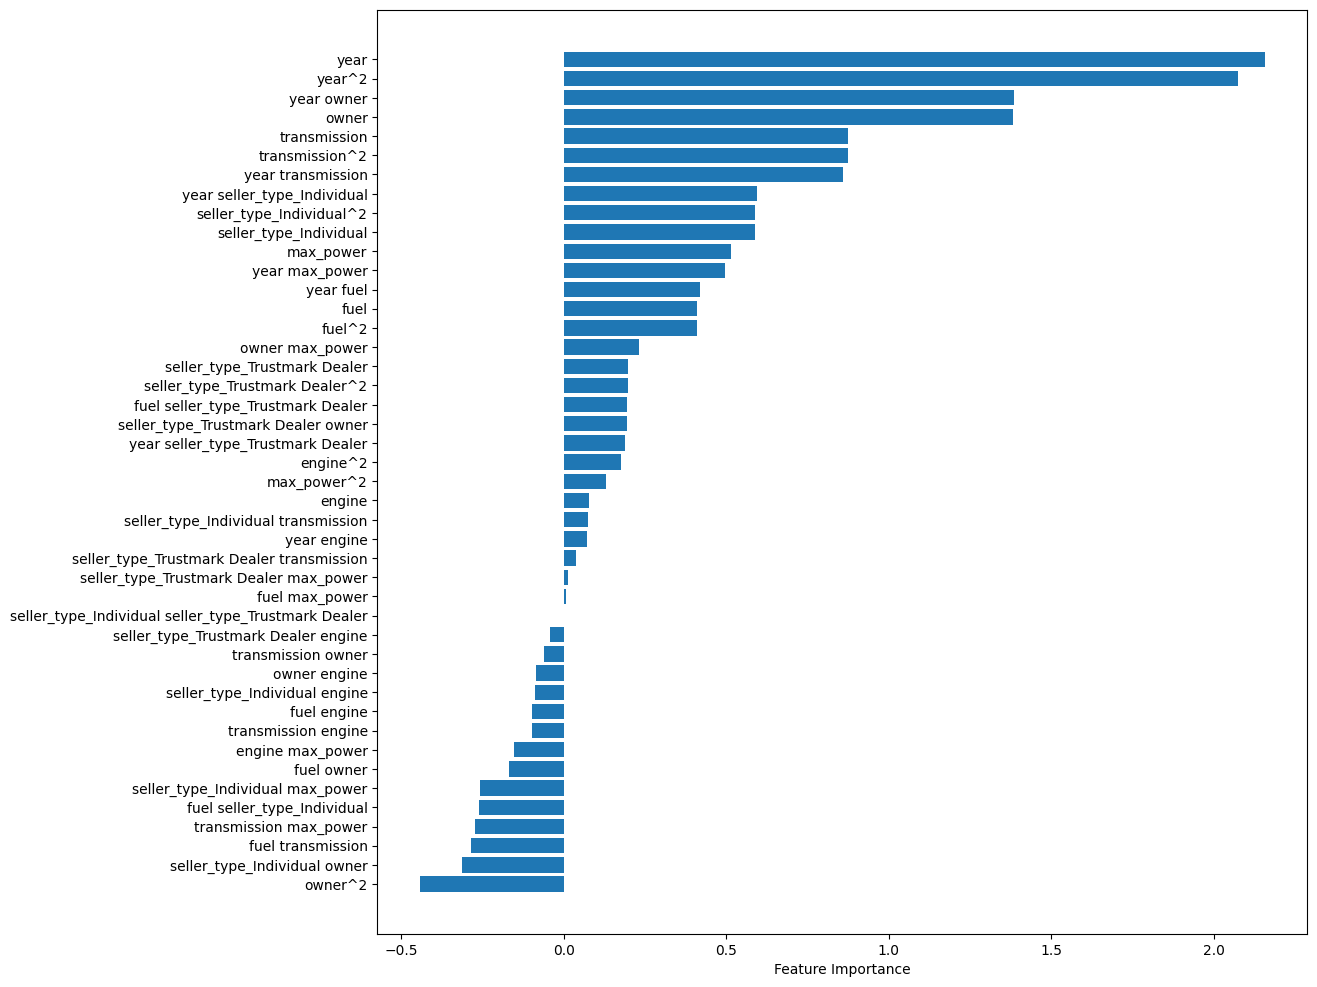

In [1006]:
plt.figure(figsize=(12, 12))
best_model.plot_feature_importance()

# 9. Inference

In [1007]:
# predicted value
str(np.exp(best_model.predict([X_test.iloc[0]])[0]))

'281958.3277194781'

In [1008]:
# true value
str(np.exp(y_test.iloc[0]))

'225000.00000000015'

### 10. Report

Data Preprocessing is the the same as A1 assignment except the year feature. The year feature need to be scaled as it makes the gradient makes it million to infinity. Although this feature is ordinal (normally suitable with label encoding), I normalize this feature with min-max scaler method considering the years that are not in the training set. I take the year cars were invented as min and the current year as max.

In the modeling step, there are six different choices, which are regression, polynomial(test only 2 degree),gradient descent methods, momentum terms(test 4 values - zero as without momentum), weight initialization methods and learning rates, to optimize the model performance. There are 576 different combinations to experiment, which is quite computing resources intensive. So, I chose a different approach that choosing a parameter or regression type at a time by setting others as the same. After deciding which is the best from experiment, I take it as default parameter in the next experiment. In this approach, there are five experiments as follow:
- Choosing the regression types (8)
- Choosing gradient descent methods (3)
- Choosing momentum terms (4)
- Choosing weight initialization (2)
- Choosing Learning Rates (3)
The experiment runs is reduced down to 20 from 576. All trainings are done with 100 epoch.

After the experiments, I find out that the best model is polynomial regression with ridge regularization having the parameters of 0.01 as learning rate, mini-batch as gradient descent method, 0.7 as momentum term and xavier weight initialization method. This model has around average 1.7 mse and 0.6 r2 of the val set from running 5 fold cross-validation. The test mse and r2 are also not much different from these numbers. It can be observed that the features has non-linear relationships with the target as the polynomial regression is much better than linear regression. Then, I think the mini-batch out performs other two methods as it increases the generalizability compared to "batch". It can also be found that the larger learning rate is more effective. The others parameters make only slight difference. The summary table and the scatter plots of Val MSE and r2 of each fold in are shown in the below.


In the feature importance plot, it can be seen that the year feature is the most important feature. The top three features are year and its featuring crossings following transmission, owner, seller types and max_power.

In [1010]:
# Summarizing the 20 runs of the 5 experiments
Comparison = pd.concat([Exp1_Result,Exp2_Result,Exp3_Result,Exp4_Result,Exp5_Result],axis=0)
Comparison.sort_values('Val_MSE')

,Regression,Polynomial,GD_methods,Momentum_Term,Weight_Initialization,Learning_Rates,Val_MSE,Val_R2
39,Ridge,True,mini,0.70,xavier,0.0100,1.748,0.594
27,Ridge,True,mini,0.00,xavier,0.0100,1.756,0.592
39,Ridge,True,mini,0.70,xavier,0.0100,1.758,0.598
39,Ridge,True,mini,0.70,xavier,0.0100,1.758,0.596
33,Ridge,True,mini,0.40,xavier,0.0100,1.768,0.596
36,Ridge,True,mini,0.70,zeros,0.0100,1.808,0.606
40,Ridge,True,mini,0.70,xavier,0.0010,2.460,0.710
45,Ridge,True,mini,0.99,xavier,0.0100,4.848,0.856
45,Ridge,True,mini,0.99,xavier,0.0100,4.868,0.856
41,Ridge,True,mini,0.70,xavier,0.0001,11.546,0.940


(<Axes: title={'center': 'Experiment05_Learning_Rates'}>,
 Text(0.5, 1.0, 'Experiment05_Learning_Rates'))

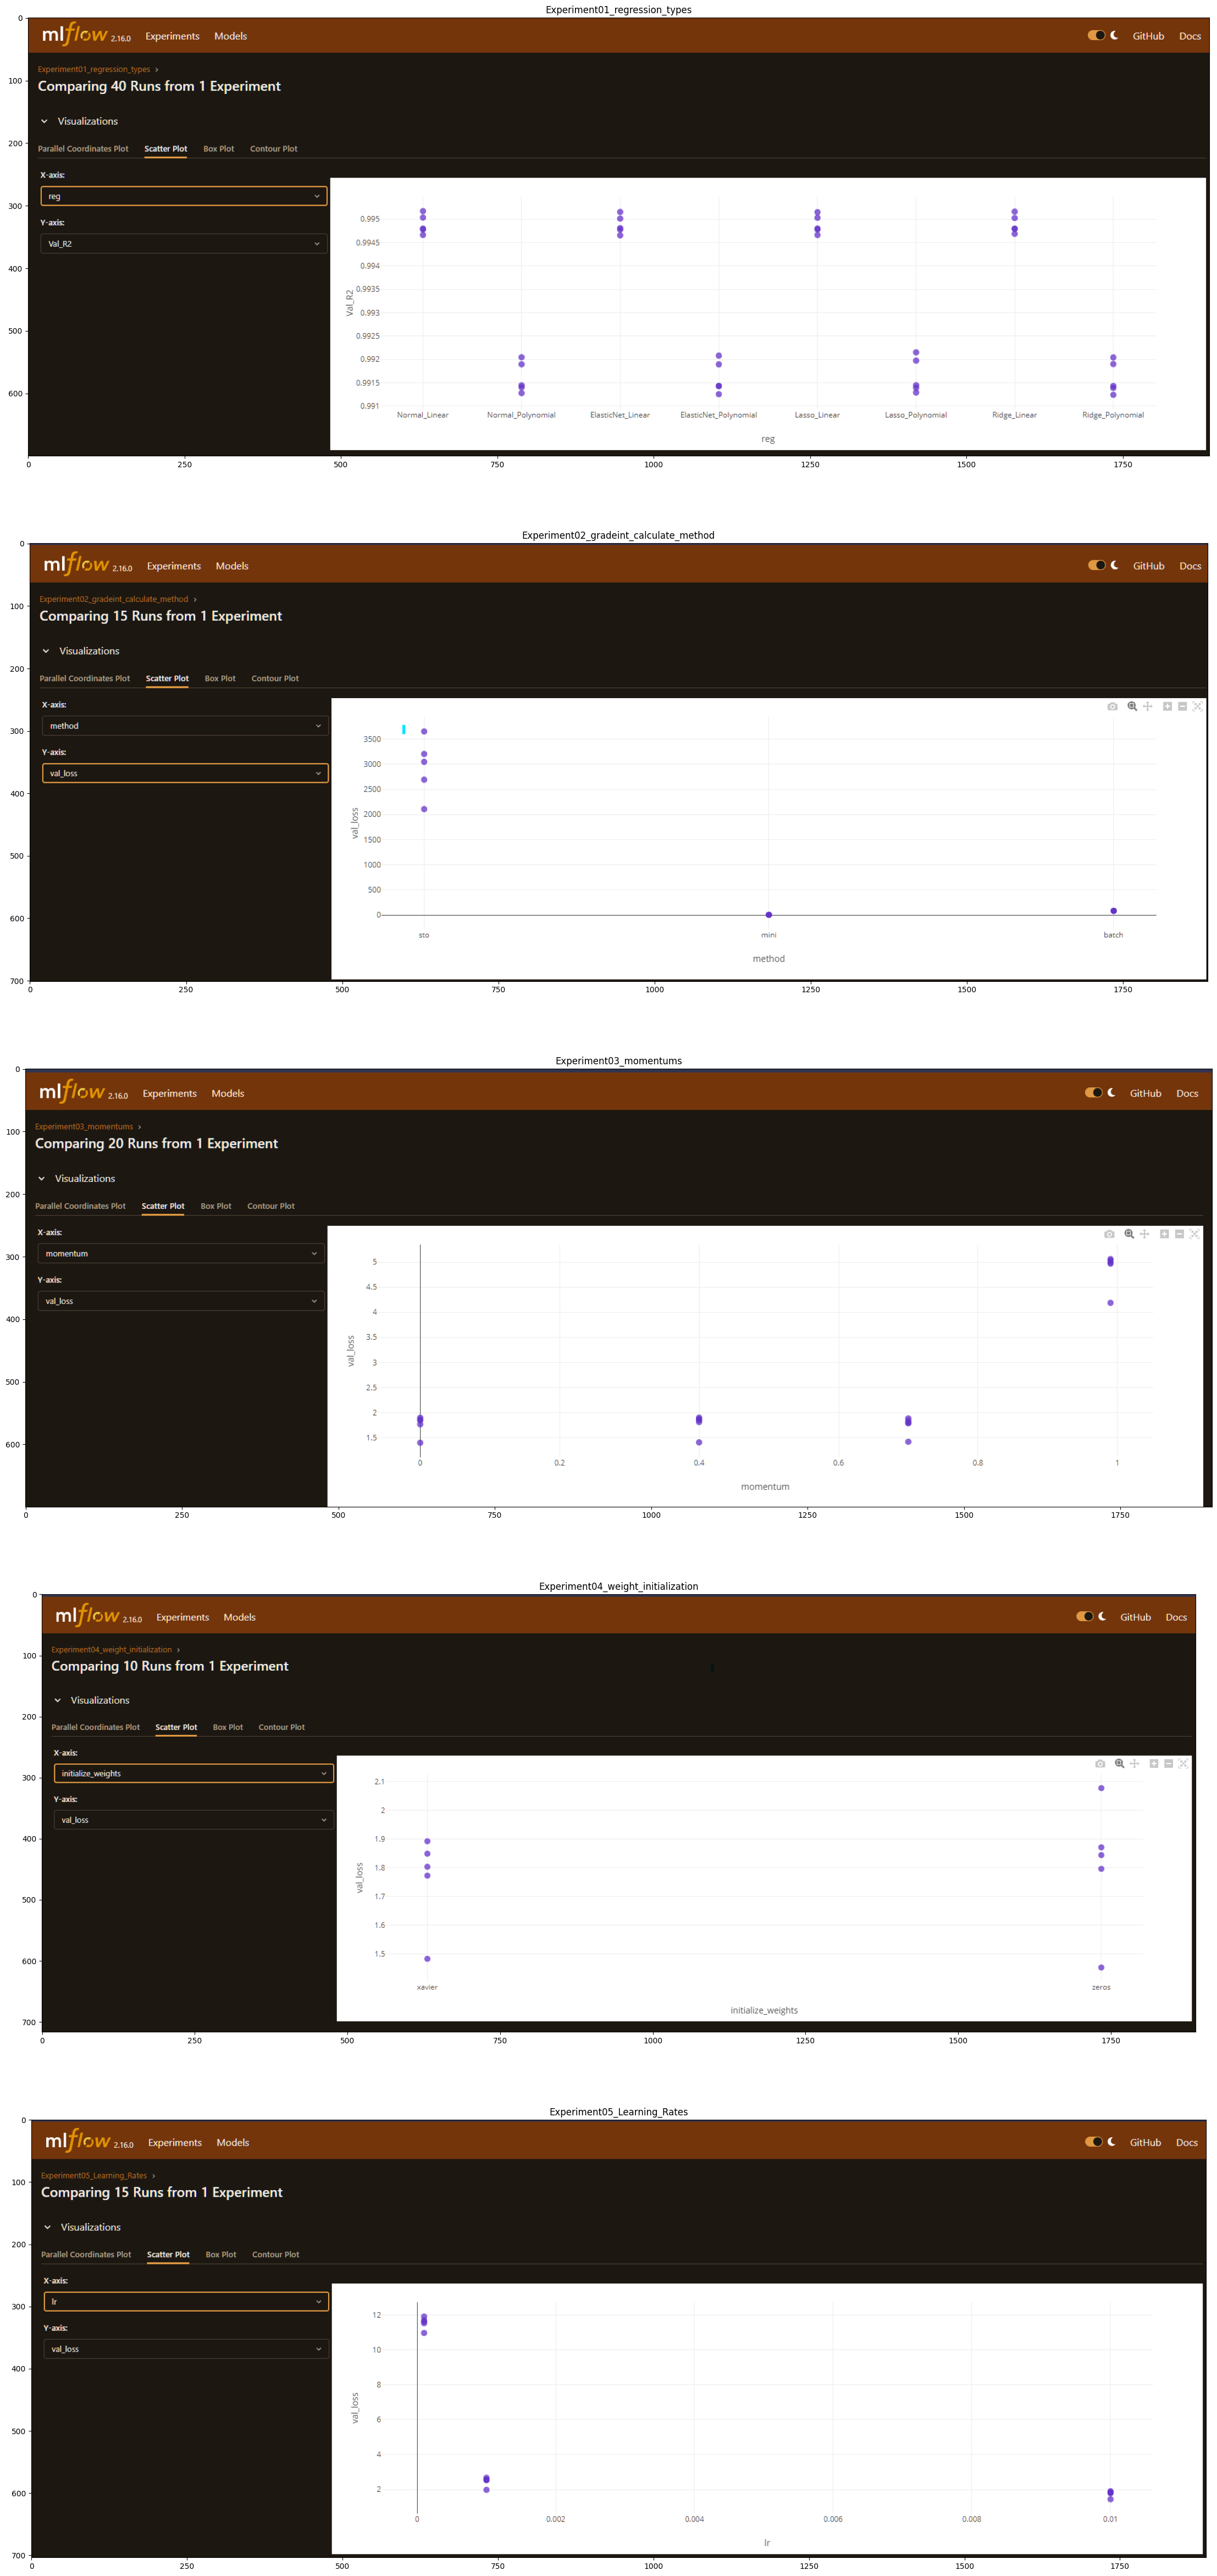

In [1011]:
import cv2 as cv
Exp01 = cv.imread('./Images/Exp01.png')
Exp02 = cv.imread('./Images/Exp02.png')
Exp03 = cv.imread('./Images/Exp03.png')
Exp04 = cv.imread('./Images/Exp04.png')
Exp05 = cv.imread('./Images/Exp05.png')
plt.figure(figsize=(60,60))

plt.subplot(5,1,1),plt.imshow(Exp01),plt.title('Experiment01_regression_types')
plt.subplot(5,1,2),plt.imshow(Exp02),plt.title('Experiment02_gradeint_calculate_method')
plt.subplot(5,1,3),plt.imshow(Exp03),plt.title('Experiment03_momentums')
plt.subplot(5,1,4),plt.imshow(Exp04),plt.title('Experiment04_weight_initialization')
plt.subplot(5,1,5),plt.imshow(Exp05),plt.title('Experiment05_Learning_Rates')
